In [1]:
import tensorflow as tf

In [2]:
train_dir = './dataset/seg_train'
test_dir = './dataset/seg_test'

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir , image_size=(64, 64) , batch_size=32 , label_mode='int')
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir , image_size=(64, 64) , batch_size=32 , label_mode='int')

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [4]:
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [6]:
tf.random.set_seed(1234)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.3910 - loss: 1.7197 - val_accuracy: 0.4840 - val_loss: 1.3242
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5143 - loss: 1.2696 - val_accuracy: 0.4817 - val_loss: 1.3344
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5248 - loss: 1.2258 - val_accuracy: 0.4997 - val_loss: 1.2747
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5558 - loss: 1.1583 - val_accuracy: 0.5557 - val_loss: 1.1667
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5772 - loss: 1.1077 - val_accuracy: 0.5620 - val_loss: 1.1416
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5917 - loss: 1.0779 - val_accuracy: 0.5637 - val_loss: 1.1495
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6040 - loss: 1.0493 - val_accuracy: 0.5703 - val_loss: 1.1294
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6070 - loss: 1.0282 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


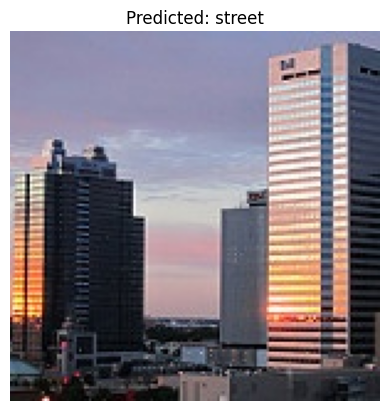

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


image_path = './dataset/seg_pred/seg_pred/5.jpg'  

img = Image.open(image_path).resize((64, 64))  
img_array = np.array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0) 


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

index_obj ={
    0 : 'Building',
    1 : 'forest',
    2 : 'glacier',
    3 : 'mountain',
    4 : 'sea',
    5 : 'street'
}

plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {index_obj[predicted_class[0]]}")
plt.axis('off')
plt.show()
